source: http://blogs.worldbank.org/opendata/accessing-world-bank-data-apis-python-r-ruby-stata

In [ ]:
import wbdata
import pandas
import matplotlib.pyplot as plt
%matplotlib inline
 

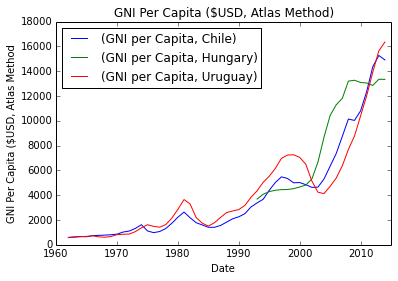

In [42]:
#set up the countries I want
countries = ["CL","UY","HU"]
 
#set up the indicator I want (just build up the dict if you want more than one)
indicators = {'NY.GNP.PCAP.CD':'GNI per Capita'}
 
#grab indicators above for countires above and load into data frame
df = wbdata.get_dataframe(indicators, country=countries, convert_date=False)

#df is "pivoted", pandas' unstack fucntion helps reshape it into something plottable
dfu = df.unstack(level=0)

# a simple matplotlib plot with legend, labels and a title
dfu.plot(); 
plt.legend(loc='best'); 
plt.title("GNI Per Capita ($USD, Atlas Method)"); 
plt.xlabel('Date'); plt.ylabel('GNI Per Capita ($USD, Atlas Method');

### exlore data with pandas

In [41]:
print dfu.columns;
print dfu.head()

Index([u'Chile', u'Hungary', u'Uruguay'], dtype='object', name=u'country')
country  Chile  Hungary  Uruguay
date                            
1960       NaN      NaN      NaN
1961       NaN      NaN      NaN
1962       600      NaN      580
1963       640      NaN      610
1964       660      NaN      660


In [43]:
df = dfu

In [40]:
df.columns = df.columns.droplevel()
print df

AttributeError: 'Index' object has no attribute 'droplevel'

In [27]:
dfu.reset_index()

date GNI per Capita                
country                Chile Hungary Uruguay
0        1960            NaN     NaN     NaN
1        1961            NaN     NaN     NaN
2        1962            600     NaN     580
3        1963            640     NaN     610
4        1964            660     NaN     660
5        1965            650     NaN     680
6        1966            740     NaN     720
7        1967            760     NaN     640
8        1968            780     NaN     610
9        1969            810     NaN     670
10       1970            860     NaN     820
11       1971           1030     NaN     850
12       1972           1110     NaN     870
13       1973           1320     NaN    1060
14       1974           1620     NaN    1370
15       1975           1120     NaN    1620
16       1976            980     NaN    1490
17       1977           1070     NaN    1420
18       1978           1310     NaN    1630
19       1979           1740     NaN    2150
20       1980           2230     NaN    2870
21       1981           2640     NaN    3650
22       1982           2180     NaN    3290
23       1983           1780     NaN    2190
24       1984           1600     NaN    1740
25       1985           1410     NaN    1510
26       1986           1410     NaN    1780
27       1987           1560     NaN    2210
28       1988           1830     NaN    2600
29       1989           2100     NaN    2730
30       1990           2260     NaN    2840
31       1991           2510     NaN    3180
32       1992           3050     NaN    3830
33       1993           3380    3690    4350
34       1994           3670    4070    5040
35       1995           4400    4290    5530
36       1996           5020    4400    6160
37       1997           5480    4450    6970
38       1998           5350    4460    7240
39       1999           5000    4530    7260
40       2000           5020    4660    7050
41       2001           4850    4820    6500
42       2002           4630    5310    5140
43       2003           4650    6670    4240
44       2004           5310    8690    4130
45       2005           6340   10430    4720
46       2006           7360   11290    5380
47       2007           8740   11810    6370
48       2008          10140   13200    7690
49       2009          10030   13270    8770
50       2010          10800   13090   10390
51       2011          12350   13050   12010
52       2012          14350   12850   13910
53       2013          15270   13350   15640
54       2014          14910   13340   16350
55       2015            NaN     NaN     NaN

In [23]:
dfu.index.get_level_values(1)

IndexError: Too many levels: Index has only 1 level, not 2

In [18]:
print .drop(['country'], axis=1)


KeyError: 'country'

In [10]:
dfu['GNI per Capita']
dfu.columns

MultiIndex(levels=[[u'GNI per Capita'], [u'Chile', u'Hungary', u'Uruguay']],
           labels=[[0, 0, 0], [0, 1, 2]],
           names=[None, u'country'])

### plot this with Bokeh

In [3]:
from bokeh.plotting import figure

In [5]:
p = figure(width=700, height=500, title="gab", x_axis_type='datetime')
p.circle(x=df.index, y=dfu[['Close']])


KeyError: "['Close'] not in index"